### PCA Technique

Problem Starement: Apply the PCA Technique to the Following Dataset
    
Dataset --> mpg dataset from Seaborn

In [1]:
#Importing the Required Libraries
import pandas as pd 
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale 

In [2]:
#Loading the Dataset
mpg = sns.load_dataset('mpg')
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [3]:
#Checking the Shape
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


Inference: 'Horsepower' Column Contain NA values lets handle them

In [4]:
#Handling Missing value of 'Horsepower' column (Mean Imputation)

#Getting Mean of Horsepower column
mean = mpg['horsepower'].mean()
#To fill NA value of 'horsepower' with its mean
mpg['horsepower'] = mpg['horsepower'].fillna(mean)
#Checking the missing value again
mpg['horsepower'].shape

(398,)

Inference: Missing Value of 'Horsepower' is Handled

In [5]:
#Considering only numerical data 
mpg_data = mpg.iloc[:,:7]
mpg_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70


Inference: Drop 'origin' & 'Name' columns as it was of object Dtypes, There is Scaling effect in the Dataset so Normalization is Required.

In [6]:
#Converting into numpy array -- as scale() requires array format
array = mpg_data.values
#Normalizing the numerical data  by using scale()
Normal = scale(array)
Normal

array([[-0.7064387 ,  1.49819126,  1.0906037 , ...,  0.63086987,
        -1.29549834, -1.62742629],
       [-1.09075062,  1.49819126,  1.5035143 , ...,  0.85433297,
        -1.47703779, -1.62742629],
       [-0.7064387 ,  1.49819126,  1.19623199, ...,  0.55047045,
        -1.65857724, -1.62742629],
       ...,
       [ 1.08701694, -0.85632057, -0.56103873, ..., -0.79858454,
        -1.4407299 ,  1.62198339],
       [ 0.57460104, -0.85632057, -0.70507731, ..., -0.40841088,
         1.10082237,  1.62198339],
       [ 0.95891297, -0.85632057, -0.71467988, ..., -0.29608816,
         1.39128549,  1.62198339]])

#### PCA

In [7]:
#Creating PCA() instance, n_components = 7 --> Creating 7 PC's. --> As There are 7 Dimension in the Dataset
#(It is not necessary to give n_components as pca will create itself based on the dimension present)
pca = PCA(n_components = 7)
pca_values = pca.fit_transform(Normal)

In [8]:
#Pca_values/scores
pca_values

array([[ 2.66008827e+00,  9.19219419e-01, -5.59197333e-01, ...,
        -5.47534893e-01, -7.40777191e-02, -1.19574629e-01],
       [ 3.52167914e+00,  7.89385392e-01, -6.71599851e-01, ...,
        -1.70492607e-02,  2.04892610e-01,  1.01955837e-01],
       [ 2.99666032e+00,  8.61309939e-01, -9.82944731e-01, ...,
        -2.73741407e-01,  1.45643292e-01, -5.52271378e-02],
       ...,
       [-1.54940832e+00, -1.25345047e+00, -1.90472043e+00, ...,
        -2.69910971e-01, -2.52702784e-01,  1.48386234e-01],
       [-2.02492653e+00, -1.13146107e+00,  6.11690169e-01, ...,
         1.80130713e-01,  7.96337500e-02,  7.60849910e-02],
       [-2.18499323e+00, -1.23614622e+00,  7.89736600e-01, ...,
         4.61531880e-01,  9.80274056e-03,  2.78335044e-03]])

Inference: pca_values Gives the 7 PC's

In [9]:
# The amount of variance that each PCA explains is 
var = pca.explained_variance_ratio_
var

array([0.71421196, 0.12368206, 0.10411867, 0.02672353, 0.01817595,
       0.00806647, 0.00502135])

Inference: Above Are the Variance of all 7 PC's, 1st PC Contain the Maximum variance (Maximum Information) i.e. 0.71 = 71%

In [10]:
# Cumulative variance 
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([ 71.42,  83.79,  94.2 ,  96.87,  98.69,  99.5 , 100.  ])

Inference: Above Are the Cumulative Variance of all 7 PC's, 1st PC Contain the Maximum variance (Maximum Information) i.e. 71.42, next PC contain combine of 83.79 and So on till all 7 PC contains 100% Cumulative Variance

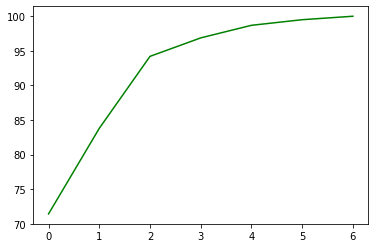

In [11]:
# Variance plot for PCA components obtained 
plt.plot(var1,color="green")

Inference: The Above Plot is of Cumulative Variance 1st PC with around 71%, 2nd PC Around 83% and so on till 7th PC overall 100%

In [12]:
#Eigen vectors
pca.components_

array([[-0.39788858,  0.41662091,  0.42987236,  0.42169968,  0.41439785,
        -0.28482775, -0.22943061],
       [-0.2118417 , -0.19112344, -0.1770462 , -0.09177648, -0.22149066,
         0.02452386, -0.91058614],
       [-0.25622271,  0.14093764,  0.10370054, -0.16802326,  0.27976321,
         0.89271346, -0.01720781],
       [ 0.74766479,  0.48509077,  0.29419874, -0.03929548, -0.11328544,
         0.12619333, -0.29804182],
       [ 0.32954795, -0.47302146, -0.06490695,  0.73848876,  0.22638038,
         0.24316442, -0.08771129],
       [-0.2355744 ,  0.35624317, -0.14648846,  0.48464459, -0.70641742,
         0.20840268,  0.1371095 ],
       [-0.08976585, -0.42902667,  0.8129489 , -0.06102848, -0.37127028,
         0.05337642,  0.05076572]])

Inference: The Above is the Eigen Vector for the Given Dataset

In [13]:
#Fetching / Indexing pca1
pca_values[:,0:1]

array([[ 2.66008827],
       [ 3.52167914],
       [ 2.99666032],
       [ 2.93592738],
       [ 2.92912842],
       [ 4.68516065],
       [ 5.19228775],
       [ 5.11035959],
       [ 5.18305485],
       [ 4.35029778],
       [ 3.80459362],
       [ 3.79690009],
       [ 3.80241957],
       [ 4.52699709],
       [-0.6792353 ],
       [ 0.43821071],
       [ 0.63942211],
       [ 0.21466582],
       [-1.04243152],
       [-2.22073089],
       [-0.94256623],
       [-0.67914432],
       [-1.02442482],
       [-0.35827074],
       [ 0.39910745],
       [ 4.56368957],
       [ 3.95859546],
       [ 4.22162711],
       [ 3.73228301],
       [-1.10455769],
       [-0.99368334],
       [-0.75947202],
       [-1.32296904],
       [ 0.88564787],
       [ 1.20081421],
       [ 1.14387746],
       [ 0.89606563],
       [ 0.9985161 ],
       [ 3.71163647],
       [ 4.2052119 ],
       [ 3.40105342],
       [ 3.25496294],
       [ 4.53281794],
       [ 4.28737759],
       [ 4.53568917],
       [ 1

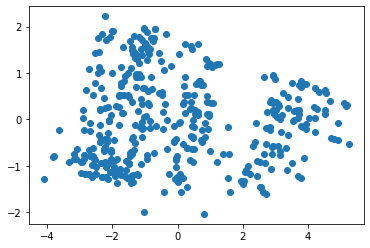

In [14]:
# plot between PCA1 and PCA2 
x = pca_values[:,0:1]
y = pca_values[:,1:2]
# = pca_values[:2:3]
plt.scatter(x,y)

In [15]:
#Concatinating PC1 & PC2 with the 'species' Name Colums
finalDf = pd.concat([pd.DataFrame(pca_values[:,0:2],columns=['pc1','pc2']), mpg[['origin','name']]], axis = 1)
finalDf.head()

,pc1,pc2,origin,name
0,2.660088,0.919219,usa,chevrolet chevelle malibu
1,3.521679,0.789385,usa,buick skylark 320
2,2.996660,0.861310,usa,plymouth satellite
3,2.935927,0.949077,usa,amc rebel sst
4,2.929128,0.931849,usa,ford torino


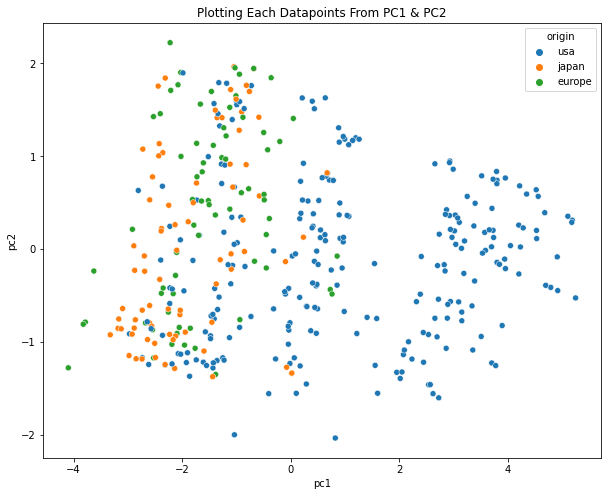

In [16]:
#Plotting Each Datapoints From PC1 & PC2 based on 'Origin' column
plt.figure(figsize=(10,8))
sns.scatterplot(data=finalDf,x='pc1',y='pc2',hue='origin')
plt.title('Plotting Each Datapoints From PC1 & PC2')
plt.show()